In [2]:
import pandas
from time import time

cols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

kddData = pandas.read_csv("kddcupFull.csv", header=None, names = cols)

In [3]:
featureNames = [
    "duration","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"
]

features = kddData[featureNames].astype(float)

In [4]:
labels = kddData['label'].copy()
labels[labels!='normal.'] = 'attack.'

normal.    595798
attack.    452778
Name: label, dtype: int64

In [5]:
from sklearn import tree
clf = KNeighborsClassifier(n_neighbors = 5, algorithm = 'ball_tree', leaf_size=500)
clf.fit(features,labels)

Classifier trained in 488.369 seconds


In [6]:
kddDataTest = pandas.read_csv("corrected.csv", header=None, names = featureNames)
kddDataTest['label'].value_counts()

testData = kddDataTest[num_features].astype(float)
trueLabels = kddDataTest['label'].copy()
true_labels[true_labels!='normal.'] = 'attack.'

In [7]:
pred = clf.predict(testData)
new_labels = pred

Assigned labels in 2447.983 seconds




Accuracy 74.591 %


Confusion Matrix: 

 [[171821  78615]
 [   415  60178]]


Classification Scores: 

               precision    recall  f1-score   support

     attack.       1.00      0.69      0.81    250436
     normal.       0.43      0.99      0.60     60593

    accuracy                           0.75    311029
   macro avg       0.72      0.84      0.71    311029
weighted avg       0.89      0.75      0.77    311029



Hamming Loss 0.25409206215497593


Matthews corrcoef 0.5411730315636453


Zero-One Loss 0.25409206215497593


<AxesSubplot:>

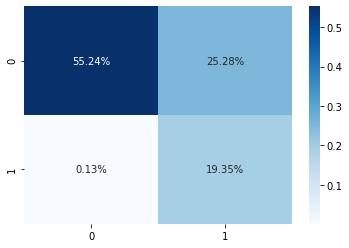

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score = accuracy_score(true_labels, new_labels)
print("\n\nAccuracy {} %".format(round(accuracy_score*100,3)))

confusion_matrix = confusion_matrix(true_labels, new_labels)
print("\n\nConfusion Matrix: \n\n {}".format(confusion_matrix))

classification_report = classification_report(true_labels, new_labels)
print("\n\nClassification Scores: \n\n {}".format(classification_report))

import seaborn as sns
import numpy as np
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')